<a href="https://colab.research.google.com/github/MohitM-AG/Projects/blob/WinDS/Image_classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Activation, BatchNormalization, Flatten, Dropout


In [2]:
img_set = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = img_set.load_data()

print('\nTrain_images.shape: {}, of {}'.format(train_images.shape, train_images.dtype))
print('Test_images.shape: {}, of {}'.format(test_images.shape, test_images.dtype))
print('Test_labels.shape: {}, of {}'.format(test_labels.shape, test_labels.dtype))
print('train_labels.shape: {}, of {}'.format(train_labels.shape, train_labels.dtype))

170498071/170498071 [==============================] - 2s 0us/step

Train_images.shape: (50000, 32, 32, 3), of uint8
Test_images.shape: (10000, 32, 32, 3), of uint8
Test_labels.shape: (10000, 1), of uint8
train_labels.shape: (50000, 1), of uint8


In [3]:
train_labels = train_labels.reshape(-1,)
print('train_labels.shape: {}, of {}'.format(train_labels.shape, train_labels.dtype))

train_labels.shape: (50000,), of uint8


In [5]:

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']


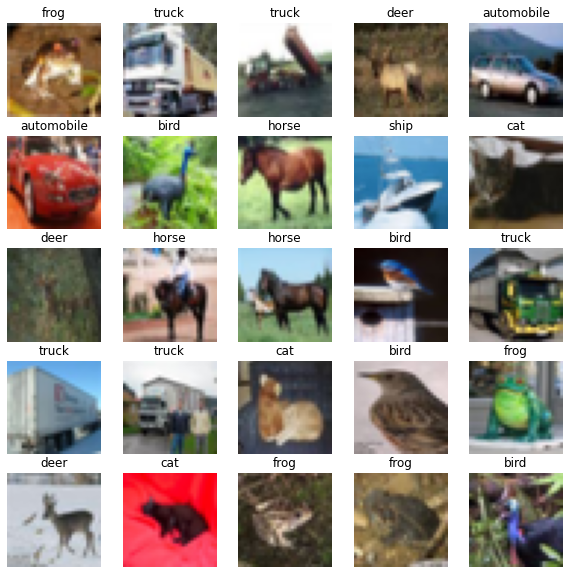

In [6]:
# plot_sample(train_images, train_labels, 11)
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
axes = axes.ravel()
for i in range(25):
    axes[i].imshow(train_images[i])
    axes[i].set_title(classes[train_labels[i]])
    axes[i].axis('off')
plt.show()

In [7]:
INPUT_SHAPE = (32, 32, 3)
# Create the model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), padding='same', input_shape= INPUT_SHAPE))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

# Add an output layer with a softmax activation function
model.add(Dense(10, activation='softmax'))


# compile model
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

# view model layers
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                        

In [8]:
EPOCHS = 100
train_images_scaled = train_images / 255.

es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2,
restore_best_weights=True,
verbose=1)


history = model.fit(train_images_scaled, train_labels,
batch_size=64, callbacks=[es_callback],
validation_split = 0.1, epochs=EPOCHS,
verbose=1)

Epoch 1/100
704/704 [==============================] - 230s 325ms/step - loss: 1.5993 - accuracy: 0.4148 - val_loss: 1.2044 - val_accuracy: 0.5750
Epoch 2/100
704/704 [==============================] - 218s 310ms/step - loss: 1.1792 - accuracy: 0.5801 - val_loss: 0.9854 - val_accuracy: 0.6556
Epoch 3/100
704/704 [==============================] - 221s 314ms/step - loss: 0.9919 - accuracy: 0.6516 - val_loss: 0.8504 - val_accuracy: 0.7066
Epoch 4/100
704/704 [==============================] - 219s 311ms/step - loss: 0.8834 - accuracy: 0.6905 - val_loss: 0.7427 - val_accuracy: 0.7374
Epoch 5/100
704/704 [==============================] - 217s 309ms/step - loss: 0.8045 - accuracy: 0.7178 - val_loss: 0.7048 - val_accuracy: 0.7570
Epoch 6/100
704/704 [==============================] - 219s 310ms/step - loss: 0.7506 - accuracy: 0.7365 - val_loss: 0.6802 - val_accuracy: 0.7678
Epoch 7/100
704/704 [==============================] - 218s 310ms/step - loss: 0.7059 - accuracy: 0.7532 - val_loss: 0

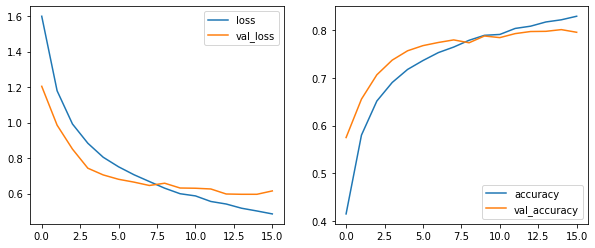

In [9]:
import pandas as pd

fig, ax = plt.subplots(1, 2, figsize=(10, 4))


history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot(kind='line', ax=ax[0])
history_df[['accuracy', 'val_accuracy']].plot(kind='line', ax=ax[1]);

313/313 [==============================] - 20s 64ms/step


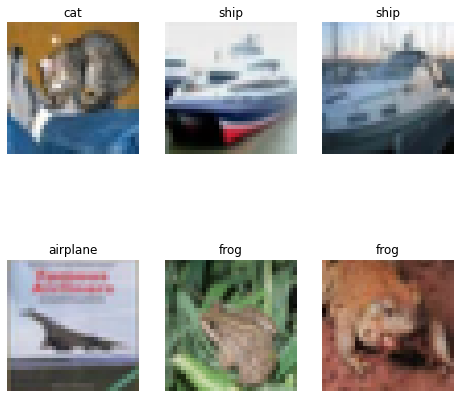

In [13]:
test_images_scaled = test_images / 255.
predictions = model.predict(test_images_scaled)

fig, axes = plt.subplots(2, 3, figsize=(8,8))
axes = axes.ravel()
for i in range(6):
    axes[i].imshow(test_images_scaled[i])
    axes[i].set_title(classes[np.argmax(predictions[i])])
    axes[i].axis('off')
plt.show()

In [11]:
prediction_labels = np.argmax(predictions, axis=1)
prediction_labels[:5]

array([3, 8, 8, 0, 6])

In [12]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

print(classification_report(test_labels, prediction_labels, target_names=classes))
pd.DataFrame(confusion_matrix(test_labels, prediction_labels), index=classes, columns=classes)

              precision    recall  f1-score   support

    airplane       0.82      0.82      0.82      1000
  automobile       0.90      0.92      0.91      1000
        bird       0.72      0.67      0.69      1000
         cat       0.61      0.60      0.60      1000
        deer       0.72      0.77      0.75      1000
         dog       0.70      0.71      0.71      1000
        frog       0.85      0.81      0.83      1000
       horse       0.81      0.85      0.83      1000
        ship       0.87      0.90      0.88      1000
       truck       0.90      0.85      0.88      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
airplane,822,11,36,18,18,3,2,9,62,19
automobile,10,916,2,5,4,3,5,0,14,41
bird,58,3,668,44,79,60,45,26,12,5
cat,17,8,62,603,61,142,46,39,12,10
deer,9,1,45,56,773,25,22,59,8,2
dog,6,0,41,140,44,708,10,44,6,1
frog,6,4,41,76,34,23,807,6,3,0
horse,9,1,19,32,43,34,3,853,2,4
ship,43,13,6,9,8,4,5,2,901,9
truck,24,62,6,11,7,5,2,12,19,852
